# Import laibraries

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# load dataset

In [29]:
data=pd.read_csv('placement.csv')

In [37]:
data.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


# EDA operations

# Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process. It involves summarizing the main characteristics of a dataset, often using visual methods. EDA helps data scientists and analysts to understand the data, identify patterns, spot anomalies, test hypotheses, and check assumptions through various statistical and graphical techniques. This process is essential for making informed decisions about the subsequent steps in the data analysis or modeling pipeline.

## Key Steps in EDA

### 1. Understanding the Data Structure
The first step in EDA is to understand the structure of the data. This includes:
- **Data Types**: Identifying the types of variables (numerical, categorical, datetime, etc.).
- **Shape of the Data**: Knowing the number of rows and columns.
- **Missing Values**: Detecting missing or null values and determining their distribution.
- **Basic Statistics**: Calculating summary statistics (mean, median, mode, standard deviation, etc.) for numericacs
print(df.describe())
plt.show()
her can provide a more comprehensive understanding of the model's performance.


In [39]:
# To check null values
data.isnull().sum()

cgpa       0
package    0
dtype: int64

In [41]:
# T0 check for duplicte rows 
data.duplicated().sum()

0

In [44]:
# description of data
data.describe()

,cgpa,package
count,200.000000,200.000000
mean,6.990500,2.996050
std,1.069409,0.691644
min,4.260000,1.370000
25%,6.190000,2.487500
50%,6.965000,2.995000
75%,7.737500,3.492500
max,9.580000,4.620000


In [7]:
# TO Know about Data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [45]:
# correlation of data
data.corr()

,cgpa,package
cgpa,1.000000,0.880692
package,0.880692,1.000000


<Axes: xlabel='cgpa', ylabel='package'>

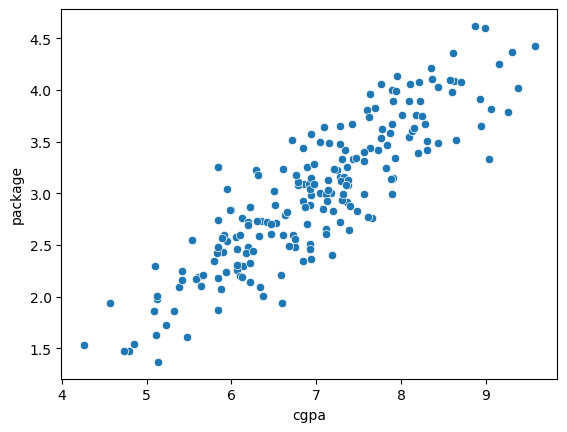

In [9]:
# visualization of data
sns.scatterplot(x='cgpa',y='package',data=data)

In [10]:
x=data[['cgpa']]
y=data['package']

# Train_Test_Split

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=17)

In [12]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape,


((160, 1), (40, 1), (160,), (40,))

In [36]:
x_test.head()

,cgpa
0,6.89
146,6.07
158,5.95
176,6.29
197,7.21


In [35]:
y_test.head()

0      3.26
146    2.46
158    3.04
176    3.23
197    3.24
Name: package, dtype: float64

In [46]:
# import LinearRegression model
from sklearn.linear_model import LinearRegression


## Fit Data to the Model

In [16]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [48]:
# prediction of Data
y_pred=model.predict(x_test)

In [49]:
#for one data checking
model.predict(x_test.iloc[3].values.reshape(1,1))


array([2.58102356])

## Distribution of Data Arround best fitline

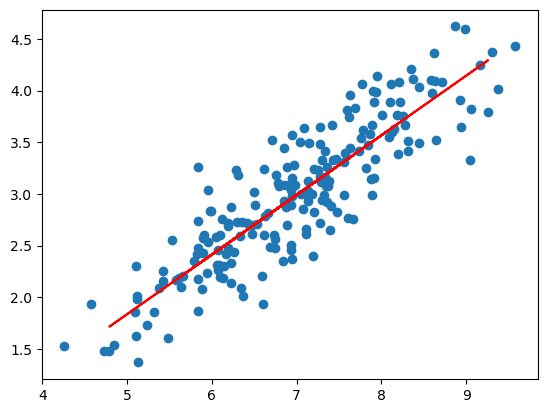

In [50]:
# Plotting the graph of testing values
plt.scatter(data['cgpa'],data['package'])
plt.plot(x_test , y_pred, color = "red")
plt.show()

In [20]:
# y = m*x + c
# Here, y = dependent variable
# x = Independent variable
# m = slope
# c = intercept

In [21]:
# linear equation is y= mx+c
m = model.coef_
c = model.intercept_


In [22]:
# y = m * x + c
y = m *6.29 + c
y

array([2.58102356])

# Error Metrics in Machine Learning: MAE, MSE, RMSE, and R²

When building and evaluating machine learning models, especially regression models, it is crucial to measure how well our model is performing. There are several metrics to assess the accuracy of predictions. This document will cover four commonly used metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R²).

## Mean Absolute Error (MAE)

### Definition
Mean Absolute Error (MAE) is the average of the absolute differences between the predicted values and the actual values. It is a straightforward metric that measures the average magnitude of errors in a set of predictions, without considering their direction.

### Formula
\[ \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} | y_i - \hat{y}_i | \]

where:
- \( y_i \) is the actual value,
- \( \hat{y}_i \) is the predicted value,
- \( n \) is the number of observations.

### Interpretation
MAE is easy to understand and interpret. It represents the average absolute deviation of predictions from the actual values. A lower MAE indicates a better fit of the model to the data. However, MAE does not give information about the direction of the errors (whether the predictions are higher or lower than the actual values).

## Mean Squared Error (MSE)

### Definition
Mean Squared Error (MSE) is the average of the squared differences between the predicted values and the actual values. By squaring the errors, MSE penalizes larger errors more than smaller ones, making it sensitive to outliers.

### Formula
\[ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} ( y_i - \hat{y}_i )^2 \]

where:
- \( y_i \) is the actual value,
- \( \hat{y}_i \) is the predicted value,
- \( n \) is the number of observations.

### Interpretation
MSE is a commonly used metric because it heavily penalizes larger errors. It provides a good indication of the model's performance, especially when large errors are particularly undesirable. A lower MSE indicates a better fit. However, because MSE squares the errors, it can be harder to interpret directly compared to MAE.

## Root Mean Squared Error (RMSE)

### Definition
Root Mean Squared Error (RMSE) is the square root of the Mean Squared Error (MSE). It provides an error metric in the same units as the original data, making it easier to interpret than MSE.

### Formula
\[ \text{RMSE} = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} ( y_i - \hat{y}_i )^2 } \]

where:
- \( y_i \) is the actual value,
- \( \hat{y}_i \) is the predicted value,
- \( n \) is the number of observations.

### Interpretation
RMSE is often preferred because it is in the same units as the dependent variable. It provides a measure of how well the model predicts the actual values. Like MSE, RMSE penalizes larger errors more heavily. A lower RMSE indicates a better fit of the model to the data.

## R-squared (R²)

### Definition
R-squared (R²) is a statistical measure that represents the proportion of the variance for a dependent variable that is explained by an independent variable or variables in a regression model. It is also known as the coefficient of determination.

### Formula
\[ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} \]

where:
- \( SS_{res} \) is the sum of squares of residuals (the differences between the actual and predicted values),
- \( SS_{tot} \) is the total sum of squares (the differences between the actual values and the mean of the actual values).

### Interpretation
R² provides an indication of the goodness of fit of a model. It ranges from 0 to 1:
- \( R^2 = 1 \): The model explains all the variability of the response data around its mean.
- \( R^2 = 0 \): The model explains none of the variability of the response data around its mean.

An \( R^2 \) value closer to 1 indicates that a larger proportion of the variance is accounted for by the model, while a value closer to 0 indicates that the model does not explain much of the variance in the data. However, R² should be used with caution, as it can be misleading in cases of overfitting or when dealing with non-linear relationships.

## Conclusion

When evaluating regression models, it is essential to use appropriate error metrics to understand the performance of the model. MAE, MSE, RMSE, and R² are some of the most commonly used metrics:

- **MAE** provides a simple measure of the average magnitude of errors.
- **MSE** and **RMSE** offer a way to penalize larger errors more heavily, with RMSE being easier to interpret.
- **R²** provides a measure of how well the model explains the variance in the data.

Choosing the right metric depends on the specific requirements and characteristics of your problem and data. Often, using multiple metrics together can provide a more comprehensive understanding of the model's performance.


In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Assuming lr is your linear regression model

y_pred = model.predict(x_test)  # Predicted values
y_true = y_test  # True values from the test set

# Calculate evaluation metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.24462502749846307
Mean Squared Error: 0.10011445050108465
Root Mean Squared Error: 0.31640867639981785
R-squared: 0.6778264290984857


# visualization of accuracy

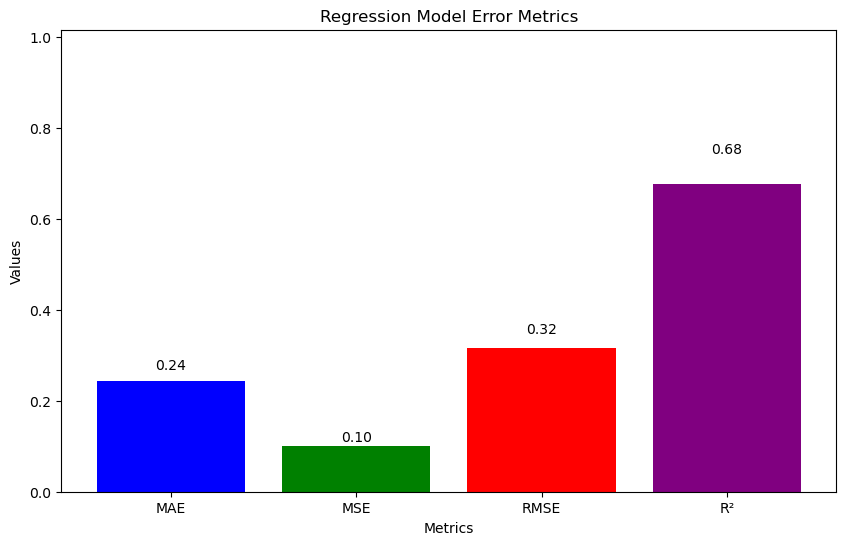

In [32]:
# Prepare data for plotting
metrics = ['MAE', 'MSE', 'RMSE', 'R²']
values = [mae, mse, rmse, r2]
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])

# Add text annotations
for i in range(len(metrics)):
    plt.text(i, values[i] + (0.1 * values[i]), f"{values[i]:.2f}", ha='center')

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Values')

plt.title('Regression Model Error Metrics')
plt.ylim(0, max(values) + 0.5 * max(values))

# Show the plot
plt.show()